# Hypothesis: 
<b>Refined:</b> A greater number of mass shootings that occurred in the 20th century was driven by mental health issues than motivated by race.

## Dataset used:                                   
`Location`: Location where incident took place                              
`City`: City where shooting took place                                  
`State`: State where shooting took place                                 
`Latitude`: Latitude coordinate where shooting occurred                                
`Longitude`: Longitude coordinate where shooting occurred                              
`Total Number of Fatalities`: Number of fatalities as a result of shooting          
`Total Number of Victims`: Number of victims as a result of shooting including fatalities and those injured     
`Description`: Description of the incident                           
`Date`: Date of shooting                                                             
`Number of shooters`: Number of shooters involved                     
`Shooter Age(s)`: Age of shooter                         
`Shooter Sex`: Shooter gender                            
`Shooter Race`: Shooter's race                                              
`Type of Gun - General`: Type of gun used in the shooting                                    
`Total Number of Guns`: Total number of gun used in the shooting                    
`Fate of Shooter`: Shooters fate                         
`Shooter's Cause of Death`: Shooters cause of death              
`School Related`: Whether the shooting was school related                     
`Place Type`: Place type where the shooting took place                             
`Relationship to Incident Location`: Shooters relationship with the incident location                   
`Targeted Victim/s - General`; Type of victims involved           
`Possible Motive - Detailed`: Detailed description of motive              
`Possible Motive - General`: High level motive of shooting             
`History of Mental Illness - Detailed`: Description of shooters mental illness   
`History of Mental Illness - General`: Indication if shooter had a mental illness     


# Questions to explore: 
1. Are there any relationships with attributes of the shooter - age, gender, mental health, race?
2. How frequent are mass shootings occurring in the US - weekly, monthly, annually? 
3. Where and when are mass shootings occurring most? 
4. Is there a correlation between location fatalities vs. injured? 
5. Weapon and shooting type?

# Exploration ideas: 
* Trump is a righty but his fans like to call themselves lefties ---- for LOLs
* Comparison between 2016 vs 2006 (10 year comparison) 
-- Year, Location, Number of Shootings related to race and mental illness 
* Explore the states/locations of these two years 
* Did potential technology advancements influence the weapon type involved in the shootings?
* Mainstream media/celebrities have influences on the shootings?
* Victims involved - types of people involved? 
* Why did the number of shootings suddenly increase so high? Did most shooters have a mental illness or were they racially motivated? 

* -- Sum of fatalities, injured, total victims 
* -- Average age across the years 
* -- Mental health, Race, no mental health 

# Presentation: 
* Executive summary/key findings 
* How did we decide on this topic? Other topics we were going to explore was housing in Sydney though there was limited data available. 
* Brainstormed other ideas like mass shootings and explored the datasets available to us
* Explored the data 
* Hypothesised different ideas and make a prediction/recommendation 
* Allow for question time - "Due to the limited time constraints..."

# Data Preparation

In [1]:
import pandas as pd 
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline


In [2]:
big_shoot = Path("big_shoot.csv")
big_shoot_df = pd.read_csv(big_shoot,parse_dates=True, infer_datetime_format=True)
pd.set_option('display.max_columns', None)

In [3]:
big_shoot_df

,CaseID,Title,Location,City,State,Latitude,Longitude,Number of Civilian Fatalities,Number of Civilian Injured,Number of Enforcement Fatalities,Number of Enforcement Injured,Total Number of Fatalities,Total Number of Victims,Description,Date,Day of Week,Date - Detailed,Shooter Name,Number of shooters,Shooter Age(s),Average Shooter Age,Shooter Sex,Shooter Race,Type of Gun - Detailed,Type of Gun - General,Number of Shotguns,Number of Rifles,Number of Handguns,Total Number of Guns,Number of Automatic Guns,Number of Semi-Automatic Guns,Fate of Shooter at the scene,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - Detailed,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,History of Mental Illness - Detailed,History of Mental Illness - General,Data Source 1,Data Source 2,Data Source 3,Data Source 4,Data Source 5,Data Source 6,Data Source 7,Military Experience,Class,Depreciation,Notes,Edit Date
0,1,University of Texas at Austin,"Austin, Texas",Austin,Texas,30.198887,-97.844159,15,32,1,0,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Monday,"Monday, August 01, 1966",Charles S. Whitman,1,25,25,Male,White American or European American,"Remington 700 ADL (6mm), Universal M1 carbine,...",Multiple guns,1,3,3,7,0,1,Deceased,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,"Family, students, teachers, and police",General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,http://en.wikipedia.org/wiki/Charles_Whitman,"Lexington Examiner (KY) - September 23, 2012",http://news.google.com/newspapers?id=lkk0AAAAI...,http://news.google.com/newspapers?id=PPUjAAAAI...,http://books.google.com/books?id=ClYEAAAAMBAJ&...,NaN,NaN,Yes,SPK,1,NaN,6/8/2016
1,2,Rose-Mar College of Beauty,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,1,0,0,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Saturday,"Saturday, November 12, 1966",Robert Benjamin Smith,1,18,18,Male,White American or European American,.22 caliber pistol,Handgun,0,0,1,1,0,0,Custody,Custody,Not applicable,Yes,College/University/Adult education,None,"Four beauty school students, one client, and h...",Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,"""Slaughter In The College Of Beauty."" Time 88....",Section: Lexington True Crime Examiner,http://www.nydailynews.com/news/crime/beauty-s...,http://books.google.com/books?id=Cre7qsswRiwC&...,NaN,NaN,NaN,Unknown,MS,1,NaN,6/8/2016
2,3,New Orleans Police Shootings,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,4,8,5,5,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Sunday,"Sunday, December 31, 1972",Mark James Robert Essex,1,23,23,Male,Black American or African American,5-shot Ruger Model 44 (.44 caliber) semi-autom...,Multiple guns,0,1,1,2,0,1,Deceased,Deceased,Killed,No,Government facility,Local government,Police officers and members of the public,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,http://news.google.com/newspapers?nid=1144&dat...,http://theadvocate.com/home/4828836-125/rampag...,http://www.trutv.com/library/crime/notorious_m...,http://books.google.com/books?id=TfEDmROcZwEC&...,NaN,NaN,NaN,Unknown,SPK,1,NaN,6/22/2016
3,4,Clara Barton Elementary School,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,3,0,0,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Thursday,"Thursday, January 17, 1974",Steven Guy,1,14,14,Male,Unknown,".38 caliber snub-nose revolver, .45 caliber pi...",Handgun,0,0,2,2,0,0,Custody,Custody,Not applicable,Yes,Primary school,Place of schooling,"School principal, teachers, and school guard",Students/Classmates/Teacher,"Former student, upset at being 

In [4]:
# Drop unused columns
big_shoot_df = big_shoot_df.drop(['Title','CaseID','Data Source 1','Data Source 2','Data Source 3','Data Source 4'
                                  ,'Data Source 5','Data Source 6','Data Source 7','Notes','Edit Date'
                                  ,'Day of Week','Average Shooter Age','Military Experience'
                                  ,'Number of Civilian Fatalities','Number of Civilian Injured'
                                  ,'Number of Enforcement Fatalities','Number of Enforcement Injured'
                                  ,'Date - Detailed','Fate of Shooter at the scene','Class','Depreciation'
                                  , 'Number of Shotguns','Number of Rifles','Number of Handguns','Number of Automatic Guns'
                                  ,'Number of Semi-Automatic Guns','Type of Gun - Detailed','Targeted Victim/s - Detailed'
                                  ],axis=1)
# Drop null values
big_shoot_df = big_shoot_df.dropna()

# Display head of cleaned dataset
big_shoot_df.head(10)

,Location,City,State,Latitude,Longitude,Total Number of Fatalities,Total Number of Victims,Description,Date,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Type of Gun - General,Total Number of Guns,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,History of Mental Illness - Detailed,History of Mental Illness - General
0,"Austin, Texas",Austin,Texas,30.198887,-97.844159,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Charles S. Whitman,1,25,Male,White American or European American,Multiple guns,7,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes
1,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Robert Benjamin Smith,1,18,Male,White American or European American,Handgun,1,Custody,Not applicable,Yes,College/University/Adult education,None,Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes
2,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Mark James Robert Essex,1,23,Male,Black American or African American,Multiple guns,2,Deceased,Killed,No,Government facility,Local government,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes
3,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Steven Guy,1,14,Male,Unknown,Handgun,2,Custody,Not applicable,Yes,Primary school,Place of schooling,Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes
4,"Olean, New York",Olean,New York,42.081854,-78.432139,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Anthony F. Barbaro,1,17,Male,White American or European American,Multiple guns,2,Custody,Not applicable,Yes,Secondary school,Place of schooling,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No
5,"Los Angeles, California",Los Angeles,California,34.176221,-118.539954,1,8,"On February 19, 1976, a 18-year-old student at...",2/19/1976,Neil Jordan Liebeskind,1,18,Male,White American or European American,Shotgun,1,Custody,Not applicable,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,"The shooting was apparently sparked, because o...",Social dispute,Unknown,Unknown
6,"Fullerton, California",Fullerton,California,33.884042,-117.927850,7,9,"On July 12, 1976, a 37-year-old custodian at C...",7/12/1976,Edward Charles Allaway,1,37,Male,White American or European American,Rifle,1,Custody,Not applicable,Yes,College/University/Adult education,Place of business/employment,Colleague/Workmate/Business acquaintance,Employee thought his coworkers at the library ...,Mental illness,"As an adult, the shooter began exhibiting symp...",Yes
7,"San Diego, California",San Diego,California,32.863573,-117.128163,2,11,"On January 29, 1979, a 16-year-old opened fire...",1/29/1979,Brenda Ann Spencer,1,16,Female,White American or European American,Rifle,1,Custody,Not applicable,Yes,Primary school,Place of residency,Students/Classmates/Teacher,"After her parents divorced, the shooter starte...",Mental illness,"In early 1978, staff at a facility for problem...",Yes
8,"Columbia, South Carolina",Columbia,South Carolina,34.050988,-80.820775,2,7,"On October 6, 1979, a 19-year-old student at U...",10/6/1979,Mark Houston,1,19,Male,Black American or African American,Handgun,1,Custody,No

In [5]:
# Check for nulls
big_shoot_df.isnull().mean() * 100

Location                                0.0
City                                    0.0
State                                   0.0
Latitude                                0.0
Longitude                               0.0
Total Number of Fatalities              0.0
Total Number of Victims                 0.0
Description                             0.0
Date                                    0.0
Shooter Name                            0.0
Number of shooters                      0.0
Shooter Age(s)                          0.0
Shooter Sex                             0.0
Shooter Race                            0.0
Type of Gun - General                   0.0
Total Number of Guns                    0.0
Fate of Shooter                         0.0
Shooter's Cause of Death                0.0
School Related                          0.0
Place Type                              0.0
Relationship to Incident Location       0.0
Targeted Victim/s - General             0.0
Possible Motive - Detailed      

In [6]:
# Rename columns
big_shoot_df = big_shoot_df.rename(columns={'Total Number of Fatalities':'Total Fatalities',
                                            'Total Number of Victims':'Total Victims',
                                            'Total Number of Guns':'Total Guns Used',
                                            'History of Mental Illness - Detailed':'Mental Illness Details',
                                            'History of Mental Illness - General':'Mental Illness',
                                            'Type of Gun - General':'Gun Type'
                                           })

In [7]:
# Add 'year' column 
big_shoot_df['Year'] = pd.DatetimeIndex(big_shoot_df['Date']).year
big_shoot_df.head(5)

,Location,City,State,Latitude,Longitude,Total Fatalities,Total Victims,Description,Date,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Gun Type,Total Guns Used,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Year
0,"Austin, Texas",Austin,Texas,30.198887,-97.844159,16,48,"On August 1, 1966, a 25-year-old engineering s...",8/1/1966,Charles S. Whitman,1,25,Male,White American or European American,Multiple guns,7,Deceased,Killed,Yes,College/University/Adult education,Place of schooling,General public,A task force of professionals known as the Con...,Mental illness,Shooter had visited a psychiatrist and severa...,Yes,1966
1,"Mesa, Arizona",Mesa,Arizona,33.422687,-111.816320,5,6,"On November 12, 1966, an 18-year-old high scho...",11/12/1966,Robert Benjamin Smith,1,18,Male,White American or European American,Handgun,1,Custody,Not applicable,Yes,College/University/Adult education,None,Students/Classmates/Teacher,"When he was being arrested, the shooter announ...",Mental illness,Diagnosed as schizophrenic. Possible psychopathy,Yes,1966
2,"New Orleans, Louisiana",New Orleans,Louisiana,30.068724,-89.931474,10,22,"On New Year's Eve in 1972, a 23-year-old ex-Na...",12/31/1972,Mark James Robert Essex,1,23,Male,Black American or African American,Multiple guns,2,Deceased,Killed,No,Government facility,Local government,Government,The shooter claimed he was subjected to two ye...,Race,"During his time at the US Navy, the shooter si...",Yes,1972
3,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,1,4,"On January 17, 1974, a 14-year-old student ent...",1/17/1974,Steven Guy,1,14,Male,Unknown,Handgun,2,Custody,Not applicable,Yes,Primary school,Place of schooling,Students/Classmates/Teacher,"Former student, upset at being expelled and pl...",Expulsion/Suspension,The student was acquitted of murder charges by...,Yes,1974
4,"Olean, New York",Olean,New York,42.081854,-78.432139,3,10,"On December 30, 1974, a 17-year-old honor stud...",12/30/1974,Anthony F. Barbaro,1,17,Male,White American or European American,Multiple guns,2,Custody,Not applicable,Yes,Secondary school,Place of schooling,General public,In a note explaining his motives Barbaro wrote...,Mental illness,"In April 1975, the shooter entered a plea of n...",No,1974


['Title', 'Location', 'Date', 'Description', 'Total Fatalities',
       'Injured', 'Total Victims', 'Place Type', 'Age of Shooter',
       'Mental Health History?', 'Mental Health Details', 'Weapon Type',
       'Race', 'Gender', 'Latitude', 'Longitude', 'Year'],

# 20 years of mass shootings in the US (2000 - 2016)

- Top three years where shootings occured most were 2013, 2015 and 2016. Any related to mental health/race?
- The year 2000 had the least number of shootings. Any related to mental health/race?
- More fatalities occurred in 2015, depsite 2016 having the greatest number of shootings in total


In [8]:
# Filter dataset to year 2000 - 2016
big_20 = big_shoot_df['Year'] >= 2000
big_shoot_2000s = big_shoot_df[big_20]
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
big_shoot_2000s.head(5)

,Location,City,State,Latitude,Longitude,Total Fatalities,Total Victims,Description,Date,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Gun Type,Total Guns Used,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Year
77,"Wakefield, Boston, Massachusetts",Boston,Massachusetts,42.309041,-71.102714,7,7,"On December 26, 2000, a 42-year-old computer t...",12/26/2000,Michael McDermott,1,42,Male,Some other race,Multiple guns,3,Custody,Not applicable,No,Company/Factory/Office,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter was apparently being pursued for b...,Financial dispute,Although the shooter claimed to have been sent...,No,2000
78,"Melrose Park, Illinois",Melrose Park,Illinois,41.902896,-87.864302,6,9,"On February 5, 2001, a 66-year-old fired emplo...",2/5/2001,William D. Baker,1,66,Male,Black American or African American,Multiple guns,4,Deceased,Suicide,No,Company/Factory/Office,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter had been terminated from his posit...,Terminated/Denied/Reprimanded,None,No,2001
79,"Santee, San Diego, California",San Diego,California,32.863573,-117.128163,2,15,"On March 5, 2001, a 15-year-old student of San...",3/5/2001,"Charles Andrew ""Andy"" Williams",1,15,Male,White American or European American,Handgun,1,Custody,Not applicable,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The shooter had been bullied by his fellow stu...,Harassment,None,No,2001
80,"Grundy, Virginia",Grundy,Virginia,37.275377,-82.098772,3,6,"On January 16, 2002, a 43-year-old former stud...",1/16/2002,Peter Odighizuwa,1,43,Male,Black American or African American,Handgun,1,Custody,Not applicable,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,The shooter had withdrawn from the university ...,Failure,The shooter's defense attempted to present the...,No,2002
81,"Tucson, Arizona",Tucson,Arizona,32.153589,-110.967765,4,3,"On October 28, 2002, a 41-year-old nursing stu...",10/28/2002,"Robert Stewart Flores, Jr.",1,41,Male,Some other race,Handgun,5,Deceased,Suicide,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,The shooter had been failing out of his classe...,Failure,None,No,2002


In [9]:
# Verify unique years included in the dataset
big_shoot_2000s['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

<AxesSubplot:title={'center':'Shooter Gender Split'}>

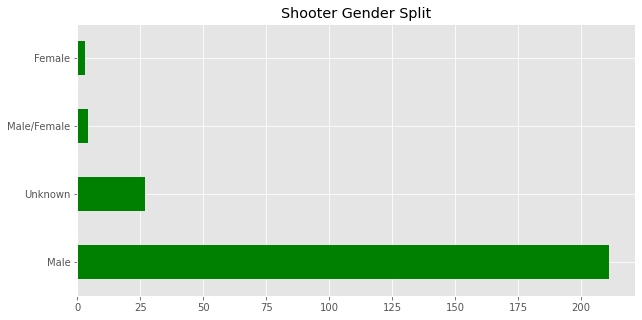

In [10]:
gender = big_shoot_2000s['Shooter Sex'].value_counts()
gender.plot(kind='barh',figsize=(10,5),color='green',title='Shooter Gender Split')

<AxesSubplot:>

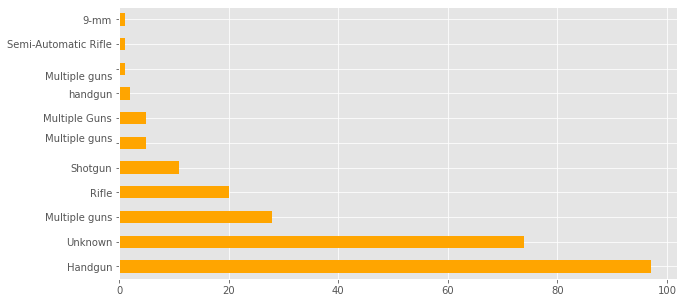

In [11]:
gun_type = big_shoot_2000s['Gun Type'].value_counts()
gun_type.plot(kind='barh',figsize=(10,5),color='orange')

<AxesSubplot:>

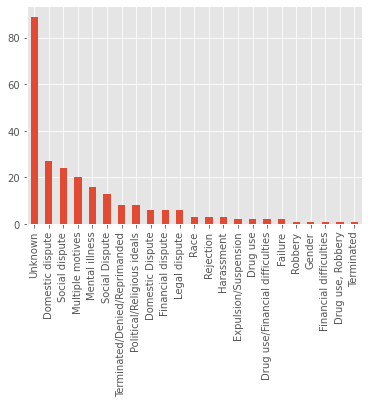

In [12]:
motive = big_shoot_2000s['Possible Motive - General'].value_counts()
motive.plot(kind='bar')

<AxesSubplot:>

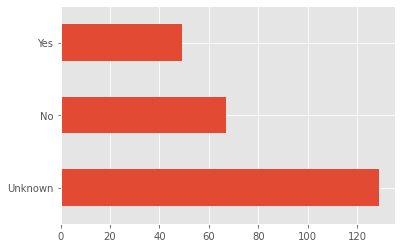

In [13]:
mental_illness = big_shoot_2000s['Mental Illness'].value_counts()
mental_illness.plot(kind='barh')

In [14]:
# Iterate through the injured columns and sum total injured victims
victim_count = 0
for i in big_shoot_2000s['Total Victims']:
    if i > 0:
        victim_count += i
        
# Iterate through the fatalities columns and sum total
fatalities_count = 0
for f in big_shoot_2000s['Total Fatalities']:
    if f > 0:
        fatalities_count += f

print(f"Sum of all victims across the 20th century: {victim_count}")
print(f"Sum of all fatalities across the 20th century: {fatalities_count}")

Sum of all victims across the 20th century: 1728
Sum of all fatalities across the 20th century: 924


In [15]:
# Define a function to calculate the percentage of fatalities in the 20th century 
def percent(victim_count,fatalities_count):
    percent = fatalities_count/(victim_count+fatalities_count)*100
    return str(percent) + "%"

print(f"Percentage of fatalities: " + percent(1728,924))

Percentage of fatalities: 34.841628959276015%


# Mental Illness Related Incidents

In [16]:
mental_20s = big_shoot_2000s['Mental Illness'] == 'Yes'
mental_2000s = big_shoot_2000s[mental_20s]
mental_2000s

,Location,City,State,Latitude,Longitude,Total Fatalities,Total Victims,Description,Date,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Gun Type,Total Guns Used,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Year
86,"Columbus, Ohio",Columbus,Ohio,39.988614,-82.989041,5,11,"On December 8, 2004, a 25-year-old former mech...",12/8/2004,Nathan Gale,1,25,Male,White American or European American,Handgun,1,Deceased,Killed,No,Entertainment venue,Place of recreation,General public,The shooter was seemingly upset by the breakup...,Multiple motives,The shooter had been discharged from the Marin...,Yes,2004
88,"Red Lake, Minnesota",Red Lake,Minnesota,47.870673,-95.005290,10,14,"On March 21, 2005, after killing his grandfath...",3/21/2005,Jeffrey James Weise,1,16,Male,Native American or Alaska Native,Multiple guns\n,3,Deceased,Suicide,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The student was ejected from Red Lake High Sch...,Expulsion/Suspension,The shooter had been under treatment for depre...,Yes,2005
89,"Goleta, California",Goleta,California,34.436061,-119.859362,8,7,"On January 30, 2006, a 44-year-old postal work...",1/30/2006,Jennifer San Marco,1,44,Female,White American or European American,Handgun,1,Deceased,Suicide,No,Government facility,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter had been on leave from the post of...,Mental illness,"Shortly before the incident, the shooter had b...",Yes,2006
91,"Essex Junction, Vermont",Essex Junction,Vermont,44.490220,-73.114006,2,4,"On August 24, 2006, a 26-year old killed two p...",8/24/2006,Christopher Williams,1,26,Male,Black American or African American,Handgun,1,Custody,Not applicable,Yes,Residential home/Neighborhood,Place of residency,Romantic partner,The shooter had just broken up with his girlfr...,Domestic dispute,The shooter was exposed to domestic violence e...,Yes,2006
92,"Hillsborough, North Carolina",Hillsborough,North Carolina,36.040999,-79.097012,1,3,"On August 30, 2006, a 18-year old former stude...",8/30/2006,Alvaro Rafael Castillo,1,18,Male,Some other race,Multiple guns\n,2,Custody,Not applicable,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The shooter admitted to kill his father becaus...,Mental illness,"The shooter was committed four months earlier,...",Yes,2006
97,"Blacksburg, Virginia",Blacksburg,Virginia,37.229955,-80.427687,33,49,"On April 16, 2007, a 23-year-old mentally ill ...",4/16/2007,Seung-Hui Cho,1,23,Male,Asian American,Handgun,2,Deceased,Suicide,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,The shooter had been suffering from a long his...,Mental illness,The shooter had a long history of mental illne...,Yes,2007
99,"Cleveland, Ohio",Cleveland,Ohio,41.476576,-81.680515,1,4,"On October 11, 2007, a 14-year-old student of ...",10/11/2007,Asa H. Coon,1,14,Male,White American or European American,Handgun,2,Deceased,Suicide,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The shooter had gotten into a fight with anoth...,Expulsion/Suspension,Juvenile Court records show that shooter had a...,Yes,2007
101,"Omaha, Nebraska",Omaha,Nebraska,41.265922,-96.053814,9,12,"On December 5, 2007, a 19-year-old man from Om...",12/5/2007,Robert Hawkins,1,19,Male,White American or European American,Rifle,1,Deceased,Suicide,No,Retail/Wholesale/Services facility,Place of residency,General public,The shooter had intended to take lives before ...,Mental illness,The shooter had a long history of mental illne...,Yes,2007
106,"DeKalb, Illinois",DeKalb,Illinois,41.931721,-88.748149,6,22,"On February 14, 2008, a 27-year old former stu...",2/14/2008,Steven Phillip Kazmierczak,1,27,Male,White American or European American,Multiple guns,4,Deceased,Suicide,Yes

<AxesSubplot:title={'center':'Total Shootings per Year'}>

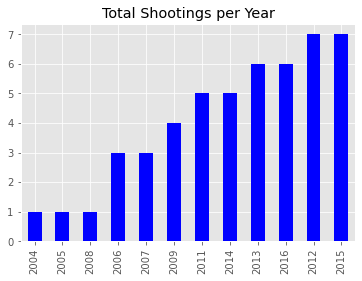

In [17]:
# Shootings per year where shooter had mental illness
mental_year = mental_2000s['Year'].value_counts().sort_values()
mental_year.plot(kind='bar',color='blue', title='Total Shootings per Year')

<AxesSubplot:title={'center':'Gender of Shooter with Mental Illness'}, ylabel='Shooter Sex'>

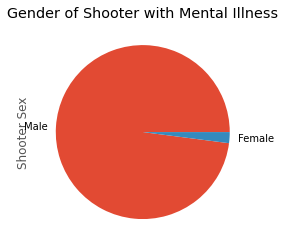

In [18]:
mental_gender = mental_2000s['Shooter Sex'].value_counts()
mental_gender.plot(kind='pie',title='Gender of Shooter with Mental Illness')

<AxesSubplot:title={'center':'Shooters Age'}>

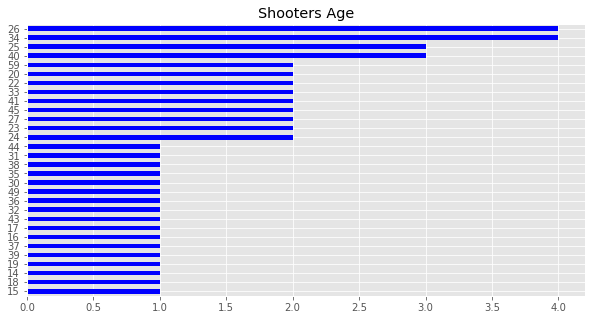

In [19]:
mental_age = mental_2000s['Shooter Age(s)'].value_counts().sort_values()
mental_age.plot(kind='barh', color='blue',title='Shooters Age',figsize=(10,5))

In [20]:
mental_motive = mental_2000s['Possible Motive - General'].value_counts()
mental_motive

Mental illness                   16
Unknown                          12
Multiple motives                  9
Domestic dispute                  5
Expulsion/Suspension              2
Terminated/Denied/Reprimanded     2
Political/Religious ideals        1
Financial dispute                 1
Gender                            1
Name: Possible Motive - General, dtype: int64

<AxesSubplot:title={'center':'Total Fatalities cause by mental illness'}, xlabel='Year'>

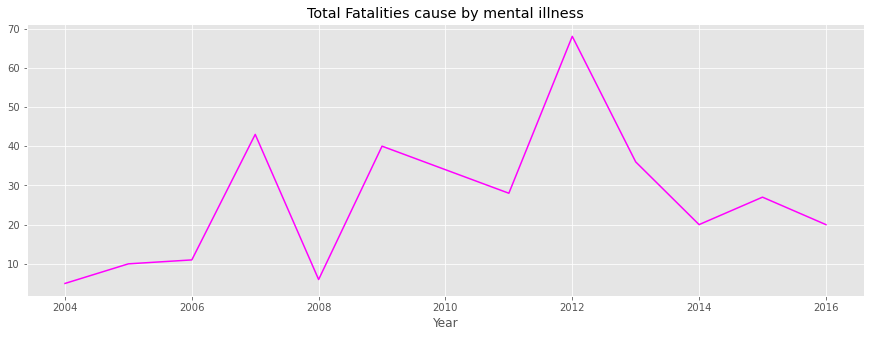

In [21]:
# Frequency of Fatalities per Year
mental_fatalities_year = mental_2000s.groupby('Year')['Total Fatalities'].sum()
mental_fatalities_year.plot(kind='line',figsize=(15,5),x='Year',y='Total Fatalities',color='magenta', title='Total Fatalities cause by mental illness')

<AxesSubplot:title={'center':'Shootings by State related to mental illness'}>

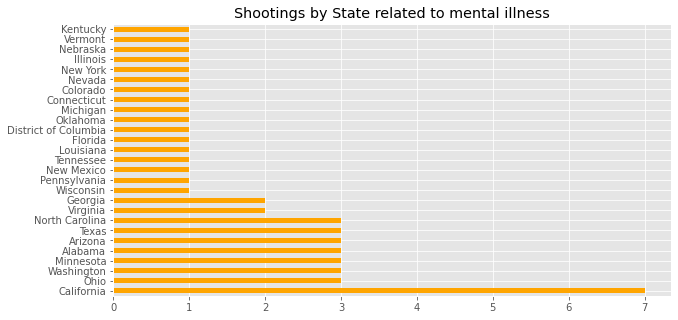

In [22]:
# Frequency of shootings per State
mental_state = mental_2000s['State'].value_counts()
mental_state.plot(kind='barh',figsize=(10,5),color='orange',title='Shootings by State related to mental illness')

### Unique race of shooters with a mental illness

In [23]:
# Create a new empty list named `unique_races`.
unique_race = []

# Iterate through `Shooter Race` and populate `unique_race` with only unique values from `Shooter Race`. Hint: try looking up "not in" conditionals for if statements
for race in big_shoot_2000s['Shooter Race'].str.lower():
    if race not in unique_race:
        unique_race.append(race)

# Print out the `unique_fruits` list.
print(f"Unique Shooter Race: {unique_race}")

Unique Shooter Race: ['some other race', 'black american or african american', 'white american or european american', 'asian american', 'native american or alaska native', 'two or more races', 'white american or european american/some other race', 'unknown', 'black american or african american/unknown']


<AxesSubplot:title={'center':'Shooter with Mental Illness by Race'}>

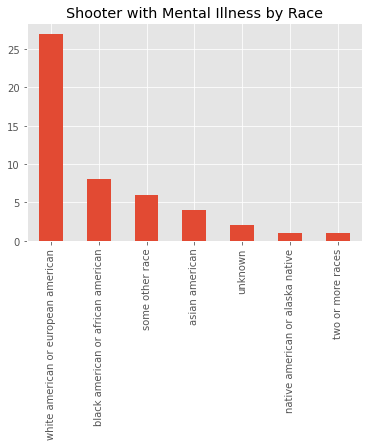

In [24]:
mental_race = mental_2000s['Shooter Race'].str.lower().value_counts()
mental_race.plot(kind='bar',title='Shooter with Mental Illness by Race')

### Loops and Functions to determine the total of fatalities and victims caused by a shooter suffering from a mental illness.
The percentage of fatalities caused by a shooter who suffers from a mental illness was 37%. 

Compared to the overall sample size where no distinction between shooters with and without a mental illness, this was only 3% higher. 

In [25]:
# Iterate through the victim and fatality columns and sum totals caused by shooter with mental illness
mental_victims = 0
for i in mental_2000s['Total Victims']:
    if i > 0:
        mental_victims += i
        
# Iterate through the fatalities columns and sum total
mental_fatalities = 0
for f in mental_2000s['Total Fatalities']:
    if f > 0:
        mental_fatalities += f

print(f"Sum of all victims across the 20th century: {mental_victims}")
print(f"Sum of all fatalities across the 20th century: {mental_fatalities}")

Sum of all victims across the 20th century: 536
Sum of all fatalities across the 20th century: 314


In [26]:
# Define a function to calculate the percentage of fatalities in the 20th century caused by a shooter with mental illness
def percentage(victim_count,fatalities_count):
    percentage = mental_fatalities/(mental_victims + mental_fatalities)*100
    return str(percentage) + "%"

print(f"Percentage of fatalities: " + percentage(1728,924))

Percentage of fatalities: 36.94117647058823%


## Correlation between variables where shooter has mental illness
**Note:** Correlation is only valid for numeric variables.

There is a high positive correlation between the number of victims and fatalities indicating the higher the number of victims involved, the higher the number of fatalities and vice versa.

There is extreme low correlation between the year the shooting occurred along with the total number of victims or fatalities involved in the incident.

In [27]:
mental_corr = mental_2000s.corr()
mental_corr

,Latitude,Longitude,Total Fatalities,Total Victims,Year
Latitude,1.000000,0.039409,0.149377,-0.007290,-0.333481
Longitude,0.039409,1.000000,0.151476,0.027765,-0.080678
Total Fatalities,0.149377,0.151476,1.000000,0.685946,-0.285463
Total Victims,-0.007290,0.027765,0.685946,1.000000,-0.258614
Year,-0.333481,-0.080678,-0.285463,-0.258614,1.000000


<AxesSubplot:>

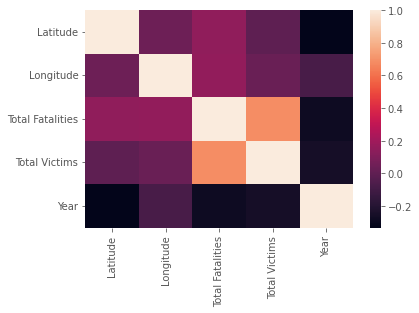

In [28]:
# Create a heatmap from the correlation values
sns.heatmap(mental_corr)

<AxesSubplot:>

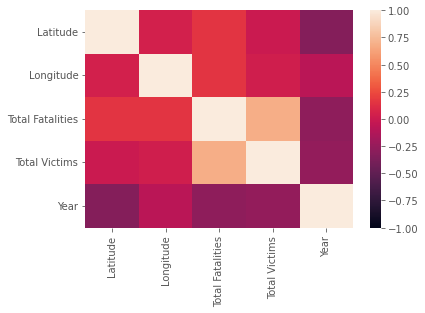

In [29]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(mental_corr, vmin=-1, vmax=1)

### Plotting shootings on a map - shooter had illness

In [51]:
import matplotlib.pyplot as plt
#plt.scatter(x=shootings_df_2017['longitude'], y=shootings_df_2017['latitude'])
#plt.show()
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [53]:
geometry = [Point(xy) for xy in zip(mental_2000s['Longitude'],mental_2000s['Latitude'])]
geometry[:3]
crs = {'init':'epsg:3395'}
geo_df = gpd.GeoDataFrame(mental_2000s,crs=crs,geometry=geometry)
geo_df.head()

/Users/kellytran/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Location,City,State,Latitude,Longitude,Total Fatalities,Total Victims,Description,Date,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Gun Type,Total Guns Used,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Year,geometry
86,"Columbus, Ohio",Columbus,Ohio,39.988614,-82.989041,5,11,"On December 8, 2004, a 25-year-old former mech...",12/8/2004,Nathan Gale,1,25,Male,White American or European American,Handgun,1,Deceased,Killed,No,Entertainment venue,Place of recreation,General public,The shooter was seemingly upset by the breakup...,Multiple motives,The shooter had been discharged from the Marin...,Yes,2004,POINT (-82.989 39.989)
88,"Red Lake, Minnesota",Red Lake,Minnesota,47.870673,-95.005290,10,14,"On March 21, 2005, after killing his grandfath...",3/21/2005,Jeffrey James Weise,1,16,Male,Native American or Alaska Native,Multiple guns\n,3,Deceased,Suicide,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The student was ejected from Red Lake High Sch...,Expulsion/Suspension,The shooter had been under treatment for depre...,Yes,2005,POINT (-95.005 47.871)
89,"Goleta, California",Goleta,California,34.436061,-119.859362,8,7,"On January 30, 2006, a 44-year-old postal work...",1/30/2006,Jennifer San Marco,1,44,Female,White American or European American,Handgun,1,Deceased,Suicide,No,Government facility,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter had been on leave from the post of...,Mental illness,"Shortly before the incident, the shooter had b...",Yes,2006,POINT (-119.859 34.436)
91,"Essex Junction, Vermont",Essex Junction,Vermont,44.490220,-73.114006,2,4,"On August 24, 2006, a 26-year old killed two p...",8/24/2006,Christopher Williams,1,26,Male,Black American or African American,Handgun,1,Custody,Not applicable,Yes,Residential home/Neighborhood,Place of residency,Romantic partner,The shooter had just broken up with his girlfr...,Domestic dispute,The shooter was exposed to domestic violence e...,Yes,2006,POINT (-73.114 44.490)
92,"Hillsborough, North Carolina",Hillsborough,North Carolina,36.040999,-79.097012,1,3,"On August 30, 2006, a 18-year old former stude...",8/30/2006,Alvaro Rafael Castillo,1,18,Male,Some other race,Multiple guns\n,2,Custody,Not applicable,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The shooter admitted to kill his father becaus...,Mental illness,"The shooter was committed four months earlier,...",Yes,2006,POINT (-79.097 36.041)


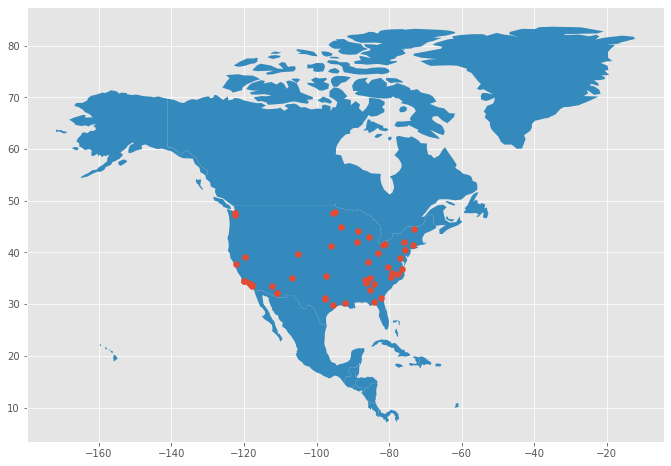

In [54]:
#ax = world.plot(figsize=(30,8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(figsize=(20,8))
plt.scatter(x=mental_2000s['Longitude'], y=mental_2000s['Latitude'])
plt.show()

# Non-Mental Illness Related

In [30]:
non_mental_20s = big_shoot_2000s['Mental Illness'] == 'No'
non_mental_2000s = big_shoot_2000s[non_mental_20s]
non_mental_2000s

,Location,City,State,Latitude,Longitude,Total Fatalities,Total Victims,Description,Date,Shooter Name,Number of shooters,Shooter Age(s),Shooter Sex,Shooter Race,Gun Type,Total Guns Used,Fate of Shooter,Shooter's Cause of Death,School Related,Place Type,Relationship to Incident Location,Targeted Victim/s - General,Possible Motive - Detailed,Possible Motive - General,Mental Illness Details,Mental Illness,Year
77,"Wakefield, Boston, Massachusetts",Boston,Massachusetts,42.309041,-71.102714,7,7,"On December 26, 2000, a 42-year-old computer t...",12/26/2000,Michael McDermott,1,42,Male,Some other race,Multiple guns,3,Custody,Not applicable,No,Company/Factory/Office,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter was apparently being pursued for b...,Financial dispute,Although the shooter claimed to have been sent...,No,2000
78,"Melrose Park, Illinois",Melrose Park,Illinois,41.902896,-87.864302,6,9,"On February 5, 2001, a 66-year-old fired emplo...",2/5/2001,William D. Baker,1,66,Male,Black American or African American,Multiple guns,4,Deceased,Suicide,No,Company/Factory/Office,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter had been terminated from his posit...,Terminated/Denied/Reprimanded,None,No,2001
79,"Santee, San Diego, California",San Diego,California,32.863573,-117.128163,2,15,"On March 5, 2001, a 15-year-old student of San...",3/5/2001,"Charles Andrew ""Andy"" Williams",1,15,Male,White American or European American,Handgun,1,Custody,Not applicable,Yes,Secondary school,Place of schooling,Students/Classmates/Teacher,The shooter had been bullied by his fellow stu...,Harassment,None,No,2001
80,"Grundy, Virginia",Grundy,Virginia,37.275377,-82.098772,3,6,"On January 16, 2002, a 43-year-old former stud...",1/16/2002,Peter Odighizuwa,1,43,Male,Black American or African American,Handgun,1,Custody,Not applicable,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,The shooter had withdrawn from the university ...,Failure,The shooter's defense attempted to present the...,No,2002
81,"Tucson, Arizona",Tucson,Arizona,32.153589,-110.967765,4,3,"On October 28, 2002, a 41-year-old nursing stu...",10/28/2002,"Robert Stewart Flores, Jr.",1,41,Male,Some other race,Handgun,5,Deceased,Suicide,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,The shooter had been failing out of his classe...,Failure,None,No,2002
82,"Cleveland, Ohio",Cleveland,Ohio,41.476576,-81.680515,1,3,"On May 9, 2003, a graduate of the Case Western...",5/9/2003,Biswanath Halder,1,62,Male,Asian American,Handgun,2,Custody,Not applicable,Yes,College/University/Adult education,Place of schooling,Students/Classmates/Teacher,The shooter had attempted to sue an employer o...,Legal dispute,None,No,2003
83,"Meridian, Mississippi",Meridian,Mississippi,32.384552,-88.689679,7,14,"On July 8, 2003, a 48-year-old factory worker ...",7/8/2003,Doug Williams,1,48,Male,White American or European American,Multiple guns,2,Deceased,Suicide,No,Company/Factory/Office,Place of business/employment,Colleague/Workmate/Business acquaintance,Initial reports touted the incident as being r...,Multiple motives,Although the shooter did not seek treatment fo...,No,2003
84,"Chicago, Illinois",Chicago,Illinois,41.839280,-87.688181,7,6,"On August 27, 2003, a 36-year-old former emplo...",8/27/2003,Salvador Tapia,1,36,Male,Some other race,Handgun,1,Deceased,Killed,No,Company/Factory/Office,Place of business/employment,Colleague/Workmate/Business acquaintance,The shooter had been fired from his position d...,Terminated/Denied/Reprimanded,None,No,2003
85,"Birchwood, Wisconsin",Birchwood,Wisconsin,45.657737,-91.550772,6,8,"On November 21, 2004, a 36-year-old man huntin...",11/21/2004,Chai Soua Vang,1,36,Male,Asian American,Rifle,1,Custody,Not applicable,No,Park/Wildness,Place of recreation,Social,"The shooter had been on unmarked, private prop...",Social dispute,None,No,2004
87,"Brookfi

# MJ Dataset - contains more recent data > 2016

In [31]:
mass_shootings = Path("mj_mass_shootings.csv")
shootings_df = pd.read_csv(mass_shootings)
pd.set_option('display.max_columns', None)

In [32]:
shootings_df = shootings_df.drop(['sources','mental_health_sources','sources_additional_age'],axis=1)
shootings_df.head(10)

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,-,-,-,-,-,-,-,-,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,-,-,-,-,semiautomatic handgun,Sig Sauer 9mm pistol,-,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",-,-,semiautomatic handguns,-,-,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,-,semiautomatic rifle,-,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,-,-,semiautomatic handgun,-,-,M,33.835420,-117.853790,Mass,2021
5,Boulder supermarket shooting,"Boulder, Colorado",3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,Yes,-,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,-,M,39.986961,-105.251168,Mass,2021
6,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/21,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,-,-,-,-,White,M,34.111653,-84.580376,Spree,2021
7,Springfield convenience store shooting,"Springfield, Missouri",3/16/20,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,-,-,-,-,-,-,M,37.210432,-93.236860,Mass,2020
8,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,-,-,semiautomatic handgun,-,Black,M,43.044511,-87.962537,Mass,2020
9,Jersey City kosher market shooting,"Jersey City, New Jersey",12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,-,-,Black,Male & Female,40.707363,-74.083609,Spree,2019


In [33]:
shootings_df_cleaned = shootings_df.replace("-","NULL")
# shootings_df_cleaned.columns = shootings_df_cleaned.columns.str.replace('location.1','location',regex=True)                                                                 
shootings_df_cleaned.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,"Sacramento, California",2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,"Oxford, Michigan",11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,NULL,NULL,NULL,NULL,semiautomatic handgun,Sig Sauer 9mm pistol,NULL,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,"San Jose, California",5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",NULL,NULL,semiautomatic handguns,NULL,NULL,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,"Indianapolis, Indiana",4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,NULL,semiautomatic rifle,NULL,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,"Orange, California",3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,NULL,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,NULL,M,33.835420,-117.853790,Mass,2021


In [34]:
shootings_df_cleaned['location'] = shootings_df_cleaned['location'].str.split(',').str[-1]
shootings_df_cleaned

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Sacramento County church shooting,California,2/28/22,"""A man believed to be meeting his three childr...",4,0,4,Religious,NULL,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,38.601110,-121.418966,Mass,2022
1,Oxford High School shooting,Michigan,11/30/21,"Ethan Crumbley, a 15-year-old student at Oxfor...",4,7,11,School,15,NULL,NULL,NULL,NULL,semiautomatic handgun,Sig Sauer 9mm pistol,NULL,M,42.844108,-83.259928,Mass,2021
2,San Jose VTA shooting,California,5/26/21,"Samuel Cassidy, 57, a Valley Transportation Au...",9,0,9,Workplace,57,yes,"Perpetrator had a history of depression, angry...",NULL,NULL,semiautomatic handguns,NULL,NULL,M,37.316097,-121.888533,Mass,2021
3,FedEx warehouse shooting,Indiana,4/15/21,"Brandon Scott Hole, 19, opened fire around 11 ...",8,7,15,Workplace,19,yes,Perpetrator had been reported to police in 202...,yes,NULL,semiautomatic rifle,NULL,White,M,39.686630,-86.323130,Mass,2021
4,Orange office complex shooting,California,3/31/21,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,NULL,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,NULL,M,33.835420,-117.853790,Mass,2021
5,Boulder supermarket shooting,Colorado,3/22/21,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,Yes,NULL,"semiautomatic rifle, semiautomatic handgun; ta...",Ruger AR-556; weapon was purchased six days be...,NULL,M,39.986961,-105.251168,Mass,2021
6,Atlanta massage parlor shootings,Georgia,3/16/21,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,NULL,NULL,NULL,NULL,NULL,NULL,White,M,34.111653,-84.580376,Spree,2021
7,Springfield convenience store shooting,Missouri,3/16/20,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,NULL,NULL,NULL,NULL,NULL,NULL,NULL,M,37.210432,-93.236860,Mass,2020
8,Molson Coors shooting,Wisconsin,2/26/20,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,NULL,NULL,NULL,NULL,semiautomatic handgun,NULL,Black,M,43.044511,-87.962537,Mass,2020
9,Jersey City kosher market shooting,New Jersey,12/10/19,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,NULL,NULL,NULL,NULL,NULL,NULL,NULL,Black,Male & Female,40.707363,-74.083609,Spree,2019


<AxesSubplot:xlabel='year'>

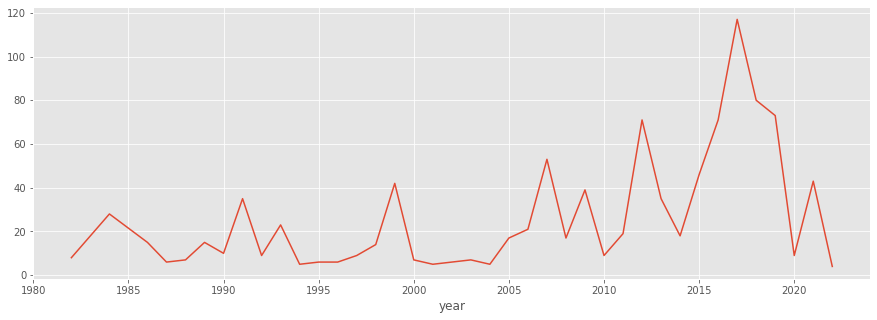

In [35]:
fatality_per_year = shootings_df_cleaned.groupby('year')['fatalities'].sum()
fatality_per_year.plot(kind='line',x='year',y='fatalities',figsize=(15,5))    

## Diving deeper into shootings in 2017
2017 had the highest number of fatalities and injured. 

In [36]:
data_2017 = shootings_df_cleaned['year'] == 2017
shootings_df_2017 = shootings_df_cleaned[data_2017]
shootings_df_2017.head()
# age_distribution.plot(kind='line',x=figsize=(10,5),color='red')

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
31,Rancho Tehama shooting spree,California,11/14/17,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,44,TBD,NULL,No,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,40.018759,-122.393089,Spree,2017
32,Texas First Baptist Church massacre,Texas,11/5/17,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,26,Yes,"Kelley had a history of domestic violence, inc...",Kelley passed federal criminal background chec...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,29.273282,-98.056488,Mass,2017
33,Walmart shooting in suburban Denver,Colorado,11/1/17,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,Other,47,Unclear,NULL,TBD,NULL,semiautomatic handgun,NULL,White,M,39.876374,-104.986132,Mass,2017
34,Edgewood businees park shooting,Maryland,10/18/17,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,Workplace,37,Unclear,NULL,No,Unclear,handgun,.380-caliber; make unclear,Black,M,39.452189,-76.309988,Mass,2017
35,Las Vegas Strip massacre,Nevada,10/1/17,"Stephen Craig Paddock, 64, fired a barrage of ...",58,546,604,Other,64,TBD,Perpetrator's history unclear. In 1969 Paddock...,Yes,Two gun shops in Nevada,"23 firearms, mostly rifles; including scopes, ...","AR-15-style and AK-47-style rifles and ""a larg...",White,M,36.095739,-115.171544,Mass,2017


In [37]:
locations_2017 = shootings_df_2017['location.1'].value_counts()
locations_2017

Workplace    5
Other        4
Religious    1
Airport      1
Name: location.1, dtype: int64

<AxesSubplot:>

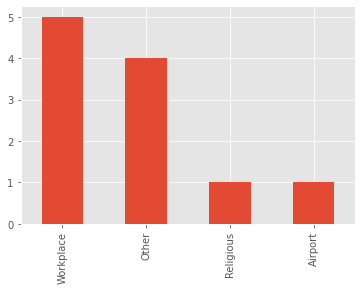

In [38]:
locations_2017.plot(kind='bar')

<AxesSubplot:ylabel='gender'>

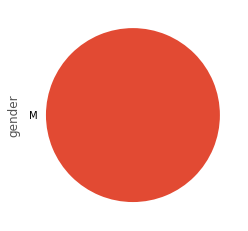

In [39]:
gender = shootings_df_2017['gender'].value_counts()
gender.plot(kind='pie')

In [40]:
had_illness = shootings_df_2017['prior_signs_mental_health_issues'].value_counts()
had_illness

Unclear    5
Yes        4
TBD        2
Name: prior_signs_mental_health_issues, dtype: int64

In [41]:
shootings_df_2017['location'] = shootings_df_2017['location'].str.split(',').str[-1]
shootings_df_2017

/var/folders/qp/hrl9kn612qv5bl275_xz0khm0000gn/T/ipykernel_4028/1186811891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shootings_df_2017['location'] = shootings_df_2017['location'].str.split(',').str[-1]


,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
31,Rancho Tehama shooting spree,California,11/14/17,"Kevin Janson Neal, 44, went on an approximatel...",5,10,15,Other,44,TBD,NULL,No,TBD,semiautomatic rifles,Two illegally modified rifles,White,M,40.018759,-122.393089,Spree,2017
32,Texas First Baptist Church massacre,Texas,11/5/17,"Devin Patrick Kelley, a 26-year-old ex-US Air ...",26,20,46,Religious,26,Yes,"Kelley had a history of domestic violence, inc...",Kelley passed federal criminal background chec...,Purchased in April 2016 from an Academy Sports...,semiautomatic rifle,Ruger AR-556; Kelley also possessed semiautoma...,White,M,29.273282,-98.056488,Mass,2017
33,Walmart shooting in suburban Denver,Colorado,11/1/17,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,Other,47,Unclear,NULL,TBD,NULL,semiautomatic handgun,NULL,White,M,39.876374,-104.986132,Mass,2017
34,Edgewood businees park shooting,Maryland,10/18/17,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,Workplace,37,Unclear,NULL,No,Unclear,handgun,.380-caliber; make unclear,Black,M,39.452189,-76.309988,Mass,2017
35,Las Vegas Strip massacre,Nevada,10/1/17,"Stephen Craig Paddock, 64, fired a barrage of ...",58,546,604,Other,64,TBD,Perpetrator's history unclear. In 1969 Paddock...,Yes,Two gun shops in Nevada,"23 firearms, mostly rifles; including scopes, ...","AR-15-style and AK-47-style rifles and ""a larg...",White,M,36.095739,-115.171544,Mass,2017
36,San Francisco UPS shooting,California,6/14/17,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,Workplace,38,Yes,"Lam had a history of domestic, work conflict",No,Unclear; the firearm was stolen in Utah. A sec...,two handguns,MAC-10-style “assault pistol”; 30-round magazi...,Asian,M,37.765947,-122.406087,Mass,2017
37,Pennsylvania supermarket shooting,Pennsylvania,6/7/17,"Randy Stair, a 24-year-old worker at Weis groc...",3,0,3,Workplace,24,Unclear,NULL,TBD,NULL,shotguns,NULL,White,M,41.529546,-75.947220,Mass,2017
38,Florida awning manufacturer shooting,Florida,6/5/2017,"John Robert Neumann, Jr., 45, a former employe...",5,0,5,Workplace,45,Unclear,NULL,TBD,NULL,semiautomatic handgun,NULL,NULL,M,28.580295,-81.294086,Mass,2017
39,Rural Ohio nursing home shooting,Ohio,5/12/2017,"Thomas Hartless, 43, shot and killed a former ...",3,0,3,Workplace,43,Yes,Hartless had a violent criminal history; his f...,TBD,NULL,"handgun, shotgun",NULL,White,M,39.959034,-82.596508,Mass,2017
40,Fresno downtown shooting,California,4/18/2017,"Kori Ali Muhammad, 39, opened fire along a str...",3,0,3,Other,39,Unclear,NULL,Unknown,NULL,handgun,.357 revolver,Black,M,36.746378,-119.800319,Mass,2017


In [42]:
import matplotlib.pyplot as plt
#plt.scatter(x=shootings_df_2017['longitude'], y=shootings_df_2017['latitude'])
#plt.show()
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [44]:
geometry = [Point(xy) for xy in zip(shootings_df_2017['longitude'],shootings_df_2017['latitude'])]
geometry[:3]
crs = {'init':'epsg:3395'}
geo_df = gpd.GeoDataFrame(shootings_df_2017,crs=crs,geometry=geometry)
geo_df.head()

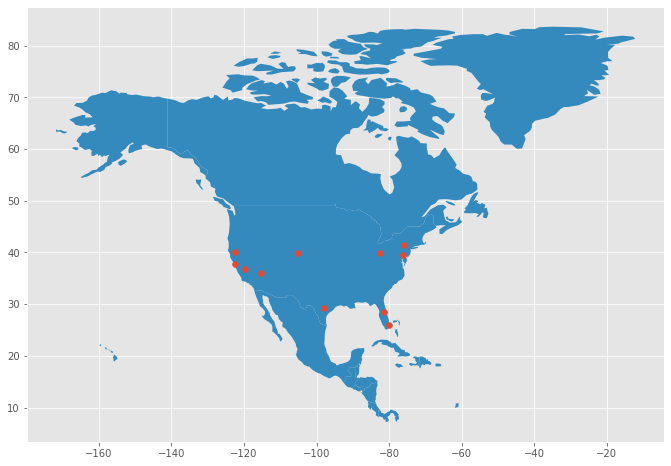

In [50]:
#ax = world.plot(figsize=(30,8))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(figsize=(20,8))
plt.scatter(x=shootings_df_2017['longitude'], y=shootings_df_2017['latitude'])
plt.show()